In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

<ipython-input-1-cbefd16408bd>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
url="https://raw.githubusercontent.com/Saisree45/Machine_Learning/main/CarSales.csv"

In [3]:
def parser(x):
	return pd.datetime.strptime(''+x, '%Y-%m')

series = pd.read_csv(url, header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64


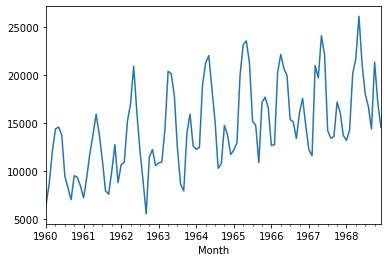

In [4]:
print(series.head())
series.plot()
plt.show()

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.



Running the example prints the first 5 rows of the dataset.

In [5]:
series.head()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64

In [6]:
series

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
              ...  
1968-08-01    16722
1968-09-01    14385
1968-10-01    21342
1968-11-01    17180
1968-12-01    14577
Name: Sales, Length: 108, dtype: int64

(d) Autocorrelation plot: Use Pandas plotting function autocorrelation plot() to create an
autocorrelation plot for your series. (2 points)

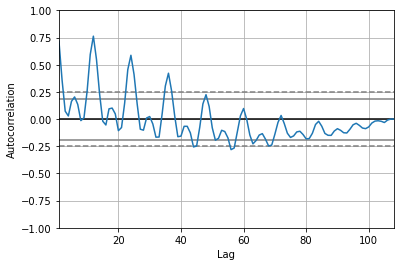

In [7]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.show()

we can see that there is a positive correlation with the first 17-18 lags that is perhaps significant for the first 20 lags.

A good starting point for the AR parameter of the model may be 5.



(e) Stationarity in time series data: Use the adfuller() function from the Statsmodels library to
perform Dickey-Fuller test to check if your time series is stationary or non-stationary. Interpret
the results of the test. (4 points)

In [8]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
result = adfuller(series)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.2238127661752842
p-value: 0.6632691049832867
Critical Values:
	1%: -3.5011373281819504
	5%: -2.8924800524857854
	10%: -2.5832749307479226


The ADF Statistic is far from the critical values and the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

(f) Automatic time series decomposition: Use seasonal decompose() function from Statsmodels
library. Specify your model as ‘additive’ and use the .plot() function to visualize the four
resulting series. Interpret the results (Do you observe any trend; if yes, what kind of trend; Is
there any seasonality in your data). (2 points)

In [10]:
import statsmodels.api as sm

In [11]:
decompose=sm.tsa.seasonal_decompose(series,model='addictive')

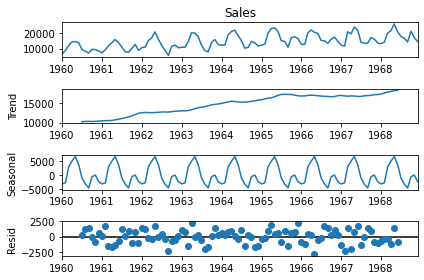

In [12]:
res=decompose.plot()

<AxesSubplot:xlabel='Month'>

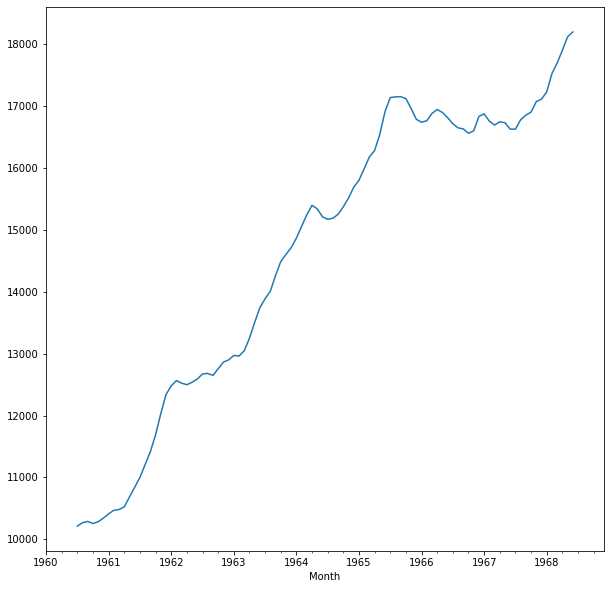

In [13]:
plt.figure(figsize=(10,10))
decompose.trend.plot()

By seeing the above graph we can say that the data looks linear.

<AxesSubplot:xlabel='Month'>

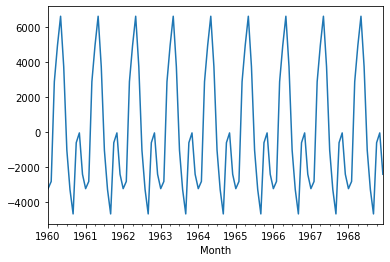

In [14]:
decompose.seasonal.plot()

By seeing the above graph we can say that the data has seasonality.

<AxesSubplot:xlabel='Month'>

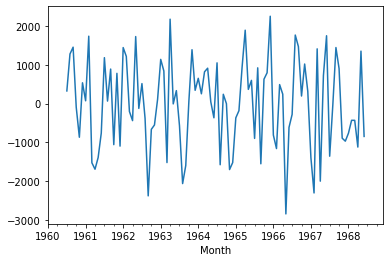

In [15]:
decompose.resid.plot()

<AxesSubplot:xlabel='Month'>

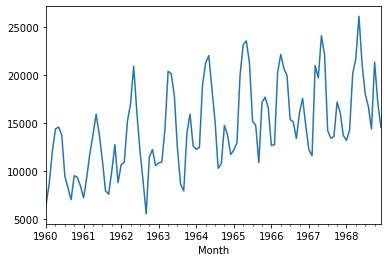

In [16]:
decompose.observed.plot()

(g) Detrend by model fitting: Use a linear model to detrend your time series data: (4 points)
i. Use the scikit-learn LinearRegression model to fit a linear model on your data.
ii. Use .predict() function to calculate the trend.
iii. Use .plot() and .show() functions to visualtize the trend and the series data on the
same plot.
iv. Deterend your sereis by subtracting the trend values from the original values of the series,
and plot the resulting detrented series in a separate plot.

(h) ARIMA with Python: To answer the questions for this part, you can take a look at the code
from Lab Session 10. (5 points)
i. Extract the NumPy array of data values and split your data into train and test with a
split of 70-30.
ii. Use the forecast() function to perform a one-step forecast using the model. Use the
train set to fit the model, and generate a prediction for each element on the test set.
iii. Perform a rolling forecast by keeping track of all observations in a list called history that is
seeded with the training data and to which new observations are appended each iteration;
Print the prediction and expected value each iteration. To define your ARIMA model for
this part use the ARIMA function from Statsmodels library, and pass in the parameters
p=5, d=1, q=1.
iv. Calculate a final root mean squared error score (RMSE) for the predictions.
v. Create a line plot to show the expected values (blue) compared to the rolling forecast
predictions (red).

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from math import sqrt
# split into train and test sets
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [18]:
train.shape

(75,)

In [19]:
test.shape

(33,)

In [28]:
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=12283.381926, expected=22135.000000
predicted=21120.604703, expected=20677.000000
predicted=23790.473463, expected=19933.000000
predicted=18222.007956, expected=15388.000000
predicted=13130.355036, expected=15113.000000
predicted=17343.560547, expected=13401.000000
predicted=15042.185975, expected=16135.000000
predicted=17774.932994, expected=17562.000000
predicted=17599.614931, expected=14720.000000
predicted=14252.282295, expected=12225.000000
predicted=10991.485701, expected=11608.000000
predicted=12710.769491, expected=20985.000000
predicted=23158.819062, expected=19692.000000
predicted=19523.526689, expected=24081.000000
predicted=20787.746422, expected=22114.000000
predicted=19577.857387, expected=14220.000000
predicted=14775.766342, expected=13434.000000
predicted=13315.556547, expected=13598.000000
predicted=17536.629760, expected=17187.000000
predicted=19892.366551, expected=16119.000000
predicted=15226.714232, expected=13713.000000
predicted=12565.986007, expected=1

Test RMSE: 3209.687871127481


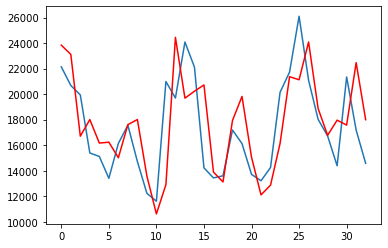

In [25]:
import math 
from sklearn.metrics import mean_squared_error

# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse))
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [23]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.70)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [26]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=3708.934
ARIMA(0, 0, 2) RMSE=3400.064
ARIMA(0, 1, 1) RMSE=3715.553
ARIMA(0, 1, 2) RMSE=3823.082
ARIMA(0, 2, 1) RMSE=3653.321
ARIMA(1, 0, 0) RMSE=3345.482
ARIMA(1, 0, 1) RMSE=3380.187
ARIMA(1, 0, 2) RMSE=3268.937
ARIMA(1, 1, 0) RMSE=3701.824
ARIMA(1, 2, 0) RMSE=4726.220
ARIMA(2, 0, 0) RMSE=3408.130
ARIMA(2, 1, 0) RMSE=3774.665
ARIMA(2, 2, 0) RMSE=4723.513
ARIMA(4, 0, 0) RMSE=3337.876
ARIMA(4, 1, 0) RMSE=3291.448
ARIMA(4, 2, 0) RMSE=3693.085
ARIMA(6, 0, 0) RMSE=3073.836
ARIMA(6, 1, 0) RMSE=3215.308
ARIMA(6, 2, 0) RMSE=3631.253
ARIMA(8, 0, 0) RMSE=3184.156
ARIMA(8, 1, 0) RMSE=3095.914
ARIMA(8, 2, 0) RMSE=3704.265
ARIMA(10, 2, 0) RMSE=3323.187
Best ARIMA(6, 0, 0) RMSE=3073.836


FORECASTING WITH 5,1,1 PARAMETERS

In [33]:
preds = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	preds.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=15288.903383, expected=22135.000000
predicted=20227.301958, expected=20677.000000
predicted=21049.379962, expected=19933.000000
predicted=18760.771403, expected=15388.000000
predicted=14762.498782, expected=15113.000000
predicted=16581.178823, expected=13401.000000
predicted=16210.313531, expected=16135.000000
predicted=18529.554638, expected=17562.000000
predicted=18830.341457, expected=14720.000000
predicted=16312.838211, expected=12225.000000
predicted=13839.032796, expected=11608.000000
predicted=14406.725331, expected=20985.000000
predicted=21825.375983, expected=19692.000000
predicted=20058.201877, expected=24081.000000
predicted=20719.514809, expected=22114.000000
predicted=18460.984981, expected=14220.000000
predicted=14257.273745, expected=13434.000000
predicted=14002.511826, expected=13598.000000
predicted=16855.622393, expected=17187.000000
predicted=19916.518897, expected=16119.000000
predicted=17511.879052, expected=13713.000000
predicted=14970.237994, expected=1

Test RMSE: 3185.038302756522


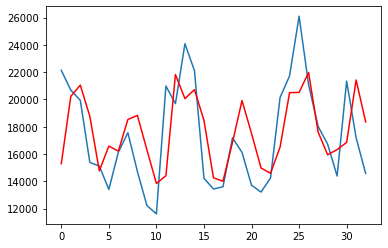

In [34]:
import math 
from sklearn.metrics import mean_squared_error

# evaluate forecasts
rmse_2 = math.sqrt(mean_squared_error(test, predictions))
print("Test RMSE: {}".format(rmse_2))
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(preds, color='red')
plt.show()

2. Problem 2: Multilayer Perceptron for Binary Classification (15 points)
(a) Define your Keras model: (5 points)
i. Define your Keras model as a fuction called create model() :
•Create a Multilayer Perceptron (fully connected) network using the Dense class with 3
layers; use the rectifier (relu) activation function on the first two layers and the sigmoid
activation function in the output layer. Include 12 neurons in the first hiddent layer,
and 8 neurons in the second hidden layer, and finally one neurons in the output layer
to predict the class.
ii. Compile your model and return it:
•Compile the model using ‘binary crossentropy’ loss, ‘adam’ optimizer and the ‘accu-
racy’ as the classification metric.